In [ ]:
#RUN THIS LINE OF CODE IF pd.read_sql_query DOES NOT WORK
#!pip install pandas==0.24.2

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [12]:
from sqlalchemy import create_engine
import getpass 
import psycopg2
import helper_functions as hp
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
db_string = "postgres://MONEYDB:{}@moneydb.cpbpjwbxydzi.us-east-2.rds.amazonaws.com:5432/postgres".format(getpass.getpass())

db = create_engine(db_string)

In [3]:
query = """

select * from public."Upward_Trends_Curr"
where "Day"= '1 Days Ago'
order by "MACD" desc

"""

In [4]:


fr = pd.read_sql_query(query,con=db)

##### 26 Days vs 12 Day MA (When 12 day 

[*********************100%***********************]  1 of 1 completed


/Users/sheenmccullough/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


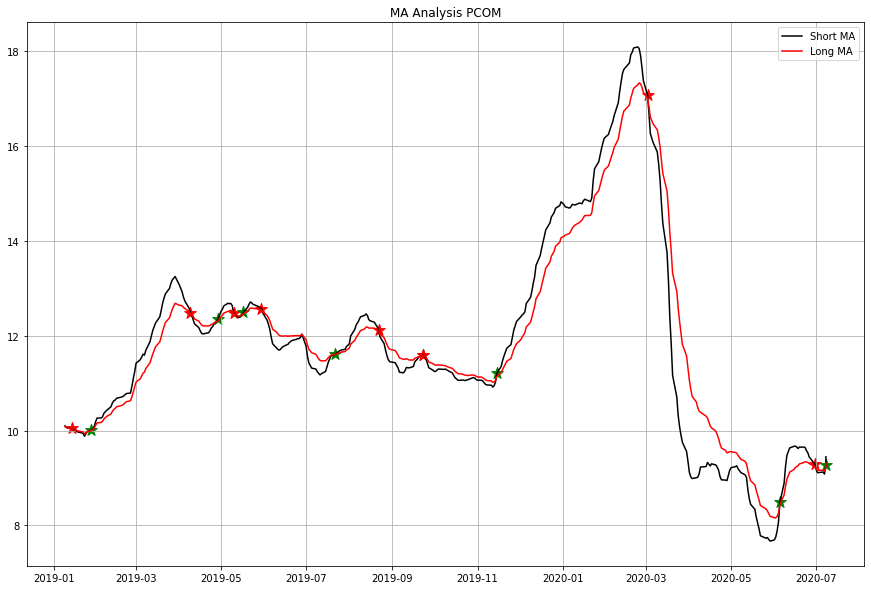

In [13]:

ticker='PCOM'
start = '2019-01-01'
now = datetime.now()
now = str(now.year)+"-"+str(now.month)+"-"+str(now.day)


SDOW = hp.generate_stock_data(start,now,ticker)




plt.figure(figsize=(15,10))
plt.plot(SDOW['Date'],SDOW['12Day_Moving_Average_Close'],label='Short MA',color='k')
plt.plot(SDOW['Date'],SDOW['26Day_Moving_Average_Close'],label='Long MA',color='r')


for values in range(len(SDOW)):
    if values!=0:
        if SDOW['MACD'].iloc[values]<0:
            if SDOW['MACD'].iloc[values-1]>0:
                plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='red',s=150)
                
    if SDOW['MACD'].iloc[values]>=0:
        if SDOW['MACD'].iloc[values-1]<0:
            plt.scatter(SDOW['Date'].iloc[values],SDOW['12Day_Moving_Average_Close'].iloc[values],marker='*',
                       color='green',s=150)
            
            
plt.title('MA Analysis {}'.format(ticker))
plt.grid()
plt.legend()
plt.show()

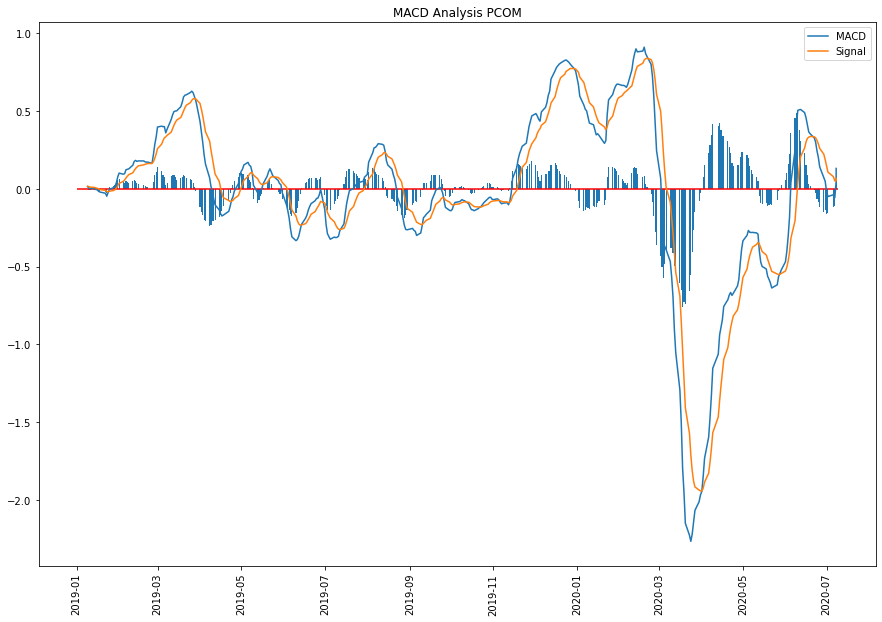

In [14]:
plt.figure(figsize=(15,10))
plt.title('MACD Analysis {}'.format(ticker))
plt.plot(SDOW['Date'],SDOW['MACD'],label='MACD')
plt.plot(SDOW['Date'],SDOW['signal'],label='Signal')
plt.hlines(0,start,now,'r')
plt.bar(SDOW['Date'],SDOW['hist'])
plt.legend()
plt.xticks(rotation=90)
plt.show()